In [2]:
import pandas as pd

price_df = pd.read_csv(r"C:\Users\86183\Desktop\average_prices.csv")
senti_df = pd.read_csv(r"C:\Users\86183\Desktop\all_senti.csv")

price_df['Date'] = pd.to_datetime(price_df['Date'])
senti_df['Date'] = pd.to_datetime(senti_df['Date'])
merged_df = pd.merge(price_df, senti_df, on='Date', how='inner')

print(merged_df)

         Date     Average     Price        Ab  Unnamed: 0     Senti      Abso
0  2024-01-04  451.876667  0.000000  0.000000         297  0.000000  0.000000
1  2024-01-05  452.282222  0.405556  0.405556         298  0.000000  0.000000
2  2024-01-08  451.347778 -0.934444  0.934444         301 -0.221625  0.221625
3  2024-01-09  452.886000  1.538222  1.538222         302  0.000000  0.000000
4  2024-01-10  449.792222 -3.093778  3.093778         303  0.074991  0.074991
..        ...         ...       ...       ...         ...       ...       ...
93 2024-05-29  556.060000  1.545000  1.545000         423 -0.024830  0.024830
94 2024-05-30  551.170000 -4.890000  4.890000         424 -0.038838  0.038838
95 2024-05-31  552.900000  1.730000  1.730000         425 -0.077276  0.077276
96 2024-06-03  550.075000 -2.825000  2.825000         428 -0.001206  0.001206
97 2024-06-04  553.190000  3.115000  3.115000         429  0.137611  0.137611

[98 rows x 7 columns]


In [8]:
correlation = merged_df['Price'].corr(merged_df['Senti'])
print(f"Correlation between senti and price: {correlation}")

Correlation between senti and price: 0.0847588215475701


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6947
Date:                Wed, 12 Jun 2024   Prob (F-statistic):              0.407
Time:                        01:12:39   Log-Likelihood:                -300.20
No. Observations:                  98   AIC:                             604.4
Df Residuals:                      96   BIC:                             609.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0398      0.528      1.968      0.0

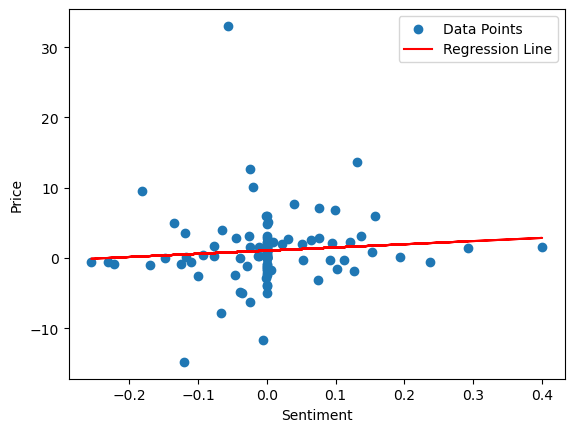

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
X = merged_df['Senti']
y = merged_df['Price']
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(y, X).fit()
print(model.summary())
plt.scatter(merged_df['Senti'], merged_df['Price'], label='Data Points')
plt.plot(merged_df['Senti'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Sentiment')
plt.ylabel('Price')
plt.legend()

In [4]:
data_price = merged_df['Price'].values
data_sentiment = merged_df['Senti'].values

In [7]:
import numpy as np
def gini_coefficient(data):
    data = np.array(data)
    n = len(data)
    data = np.sort(data)
    index = np.arange(1, n+1)
    numerator = np.sum((2 * index - n - 1) * data)
    denominator = n * np.sum(data)
    gini = numerator / denominator
    return gini

gini = gini_coefficient(data_price)
print("Gini coefficient for Price:", gini)

gini = gini_coefficient(data_sentiment)
print("Gini coefficient for Sentiment:", gini)

Gini coefficient for Price: 2.270815039829072
Gini coefficient for Sentiment: 50.565685440940975
